In [12]:
!pip install torchsummary

In [2]:
import sys
import os
sys.path.append(os.path.abspath('..'))

In [3]:
from helper import *

# Device detection and setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name(0)}")
    print(f"CUDA memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")

set_seed = 17

Using device: cpu


In [4]:
# RGB to HSV Network
class RGBtoHSVNet(nn.Module):
    def __init__(self):
        super(RGBtoHSVNet, self).__init__()
        self.fc1 = nn.Linear(3, 64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 3)
        
    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x

In [13]:
from torchsummary import summary

model1 = RGBtoHSVNet()
summary(model1, input_size=(3,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 64]             256
              ReLU-2                   [-1, 64]               0
            Linear-3                   [-1, 64]           4,160
              ReLU-4                   [-1, 64]               0
            Linear-5                    [-1, 3]             195
Total params: 4,611
Trainable params: 4,611
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.02
Estimated Total Size (MB): 0.02
----------------------------------------------------------------


In [6]:
# RGB-HSV Dataset
rgb_train = generate_rgb_samples(1000, device=device, seed=42)
hsv_train = rgb_to_hsv(rgb_train)

rgb_test = generate_rgb_samples(250, device=device, seed=17)
hsv_test = rgb_to_hsv(rgb_test)

rgb_train_loader = DataLoader(TensorDataset(rgb_train.cpu(), hsv_train.cpu()), batch_size=32, shuffle=False)
rgb_test_loader = DataLoader(TensorDataset(rgb_test.cpu(), hsv_test.cpu()), batch_size=32, shuffle=False)

All seeds set to: 0
Model weights initialized with seed: 0
All seeds set to: 1
Model weights initialized with seed: 1
All seeds set to: 2
Model weights initialized with seed: 2
All seeds set to: 3
Model weights initialized with seed: 3
All seeds set to: 4
Model weights initialized with seed: 4


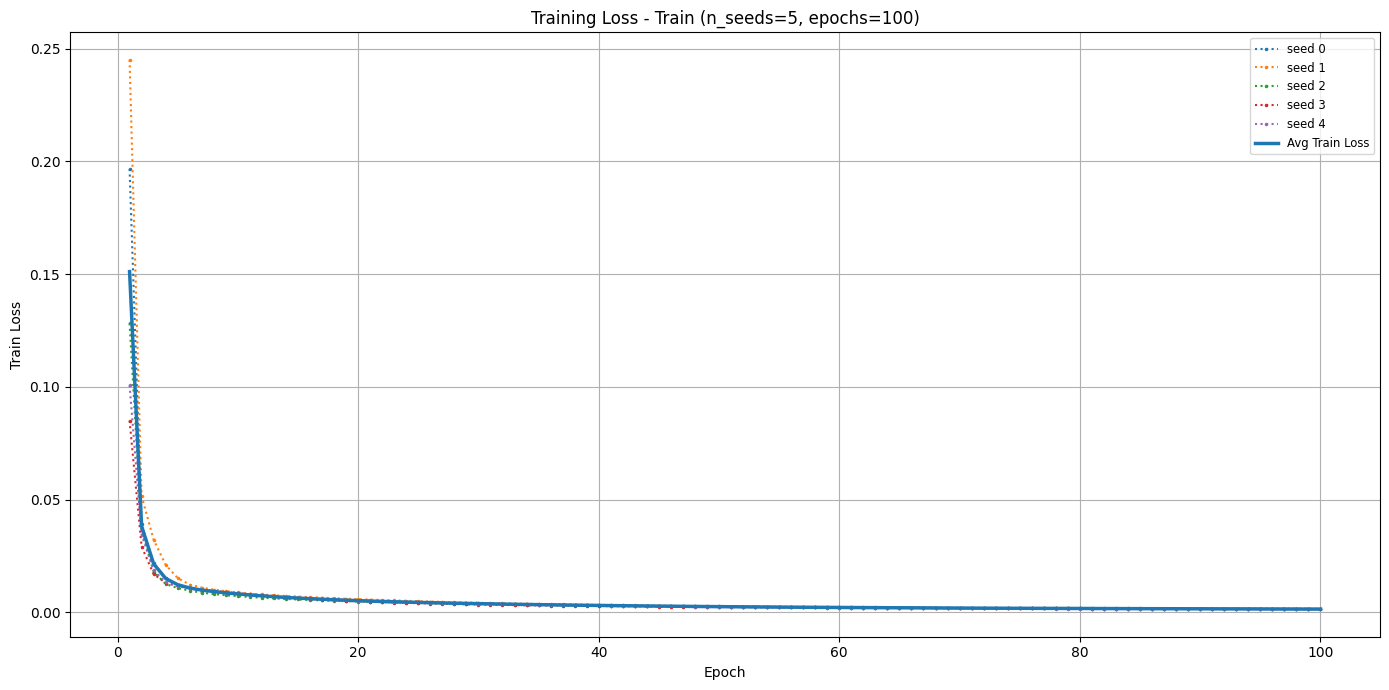

In [7]:
results_train = train_multiple_inits_and_plot(
    network_fn=lambda: RGBtoHSVNet(),
    train_loader=rgb_train_loader,
    criterion=nn.MSELoss(),
    optimizer_fn=lambda m: optim.Adam(m.parameters(), lr=0.001),
    seeds=[0,1,2,3,4],
    num_epochs=100,                    # short for smoke test
    figsize=(14,7),
    plot_val=True,
    alpha=1
)

All seeds set to: 0
Model weights initialized with seed: 0
All seeds set to: 1
Model weights initialized with seed: 1
All seeds set to: 2
Model weights initialized with seed: 2
All seeds set to: 3
Model weights initialized with seed: 3
All seeds set to: 4
Model weights initialized with seed: 4


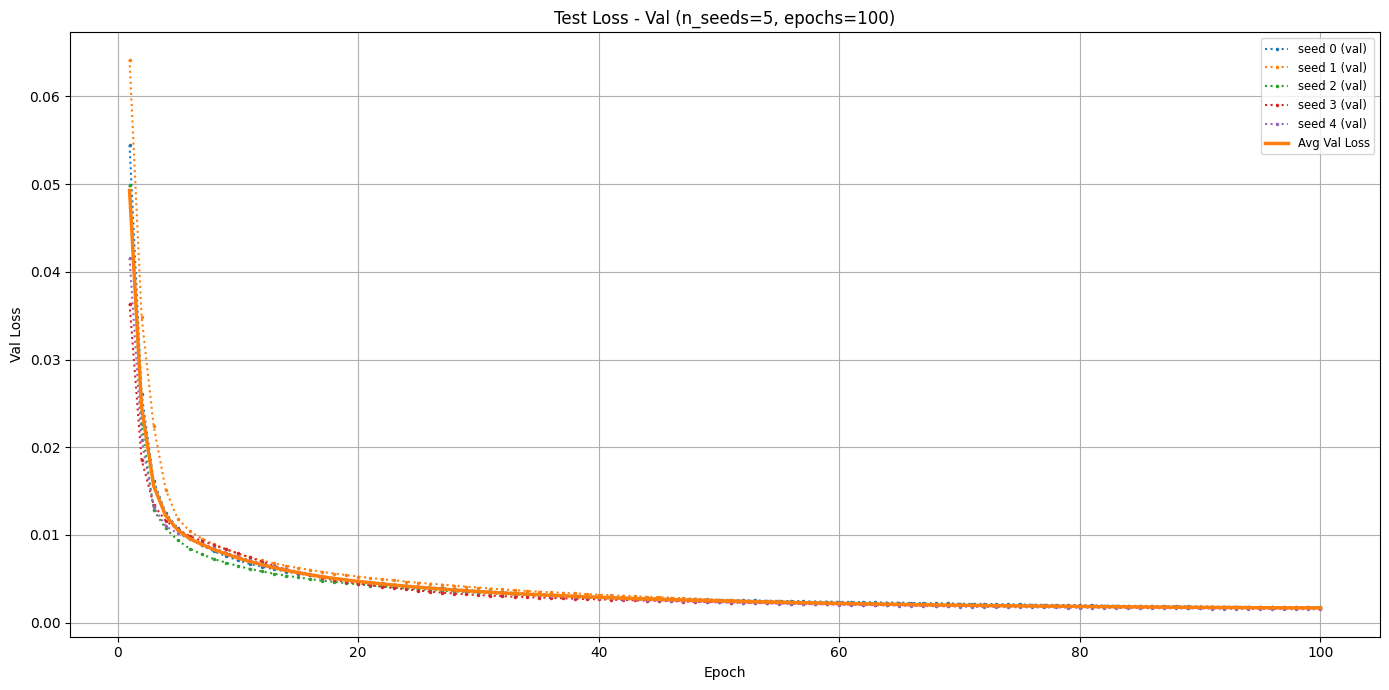

In [8]:
results_test = train_multiple_inits_and_plot(
    network_fn=lambda: RGBtoHSVNet(),
    train_loader=rgb_train_loader,
    criterion=nn.MSELoss(),
    optimizer_fn=lambda m: optim.Adam(m.parameters(), lr=0.001),
    seeds=[0,1,2,3,4],
    num_epochs=100,
    figsize=(14,7),
    test_loader=rgb_test_loader,   # required for val runs
    plot_val=True,                  # allow val runs to be recorded/used
    loss_view="val",                # show only validation (test) loss
    alpha=1,
    title_prefix="Test Loss"
)